In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Two different Matplotlib interfaces
There’re two ways to code in Matplotlib.

## State-based
The first one is state-based, which is good for creating easy plots (you call a bunch of plt.XXX to plot each component in the graph), but you don’t have too much control of the graph.


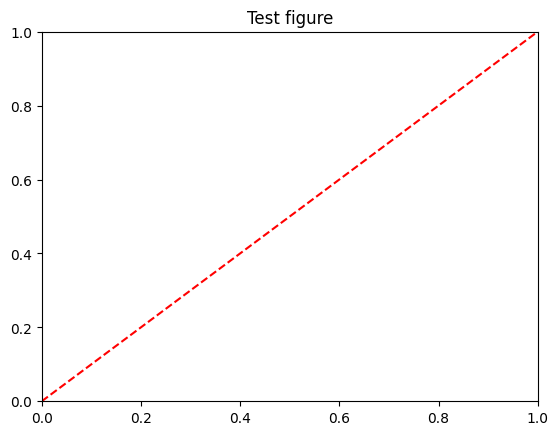

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Test figure')
plt.show()

## Object-oriented
It will take more time to code but you’ll have full control of your figure.

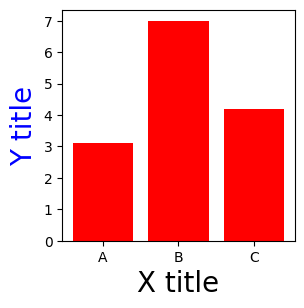

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3,3))
ax.bar(x=['A','B','C'], height=[3.1,7,4.2], color='r')
ax.set_xlabel(xlabel='X title', size=20)
ax.set_ylabel(ylabel='Y title' , color='b', size=20)
plt.show()

The idea is that you create a ‘�gure’ object, which you can think of it as a bounding box of the whole visualization you’re going to build, and one or more ‘axes’ object, which are subplots of the visualization,

# Elements in a Figure in Object-oriented interface

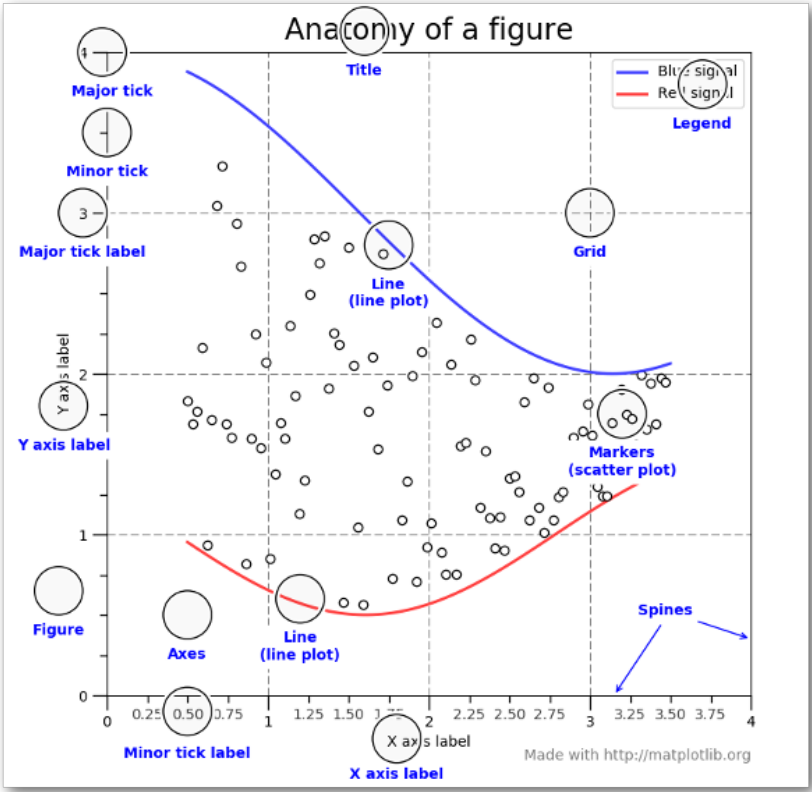

Example: creat an axes object, created a line plot on top of it, added a title, and rotated all the x-tick labels by 45 degrees counterclockwise.

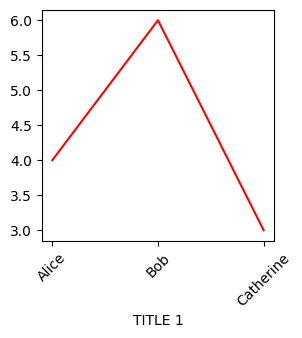

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(['Alice','Bob','Catherine'], [4,6,3], color='r')
ax.set_xlabel('TITLE 1')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.show()

# Increase the dimension of your plots
What if we’d like to show more info to these plots?

## Overlay plots
If several line charts share the same x and y variables, you can call Seaborn plots multiple times and plot all of them on the same figure. In the example below, we added one more categorical variable `[value = alpha, beta]` in the plot with overlaying plots.

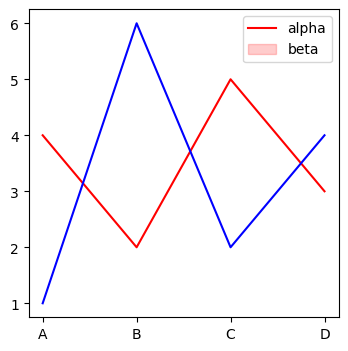

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.lineplot(x=['A','B','C','D'],
             y=[4,2,5,3],
             color='r',
             ax=ax)
sns.lineplot(x=['A','B','C','D'],
             y=[1,6,2,4],
             color='b',
             ax=ax)
ax.legend(['alpha', 'beta'], facecolor='w')
plt.show()

## Combine charts with the same x-axis but diffferent y-axis
Because the two plots have different y-axis, we need to create another ‘axes’ object with the same x-axis (using `.twinx()`) and then plot on different ‘axes’

`sns.set(…)` is to set speciffic aesthetics for the current plot, and we run `sns.set()` in the end to set everything back to default settings.

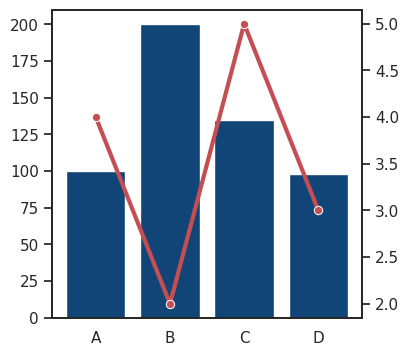

In [ ]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98],
            color='#004488',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'],
             y=[4,2,5,3],
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set()

## Add categorical dimension to the plot
Combining different barplots into one grouped barplot also adds one categorical dimension to the plot (one more categorical variable).

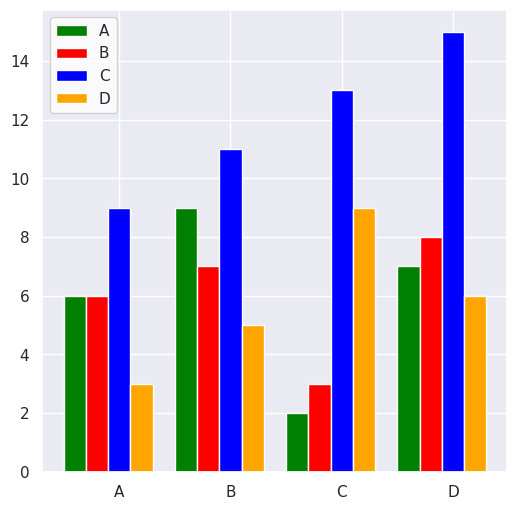

In [8]:
import matplotlib.pyplot as plt
categorical_1 = ['A', 'B', 'C', 'D']
colors = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]

number_groups = len(categorical_1)
bin_width = 1.0/(number_groups+1)

fig, ax = plt.subplots(figsize=(6,6))

for i in range(number_groups):
   ax.bar(x=np.arange(len(categorical_1)) + i*bin_width,
          height=numerical[i],
          width=bin_width,
          color=colors[i],
          align='center')

ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show()

In the code example above, you can customize variable names, colors, and figure size. number_groups and bin_width are calculated based on the input data. I then wrote a for-loop to plot the bars, one color at a time, and set the ticks and legends in the very end.

# Partition the figure using GridSpec
One of the advantages for object-oriented interface is that we can easily partition our figure into several subplots and manipulate each subplot with ‘axes’ API.

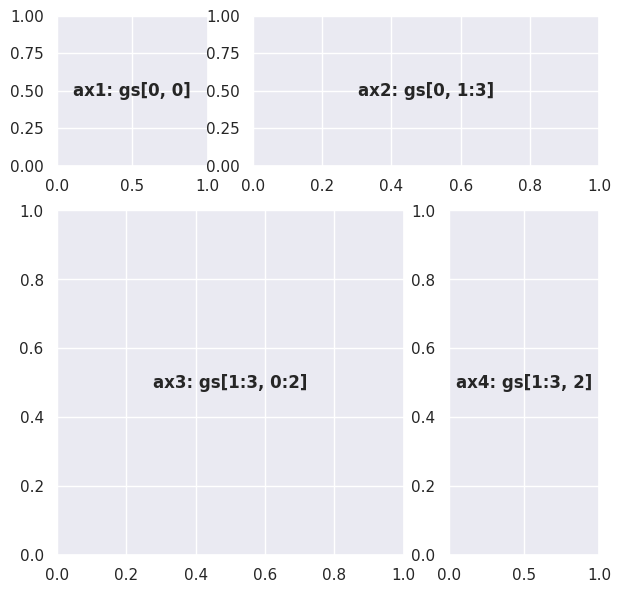

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=3,
                       ncols=3,
                       figure=fig,
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center") # adding text to ax1

ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")

ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")

ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")

plt.show()

In the example, we first partition the figure into 3*3 = 9 small boxes with gridspec.GridSpec(), and then define a few axes objects. Each axes object could contain one or more boxes. Say in the codes above, gs[0, 1:3] = gs[0, 1] + gs[0, 2] is assigned to axes object ax2. wspace and hspace are parameters controlling the space between plots.

# Partition the figure using Facet

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# Reference
https://www.deeplearning.lipingyang.org/wp-content/uploads/2019/05/A-step-by-step-guide-for-creating-advanced-Python-data-visualizations-with-Seaborn_Matplotlib.pdf